# **BERTopic - Tutorial**
We start with installing bertopic from pypi before preparing the data.

**NOTE**: Make sure to select a GPU runtime. Otherwise, the model can take quite some time to create the document embeddings!

# **Prepare data**
For this example, we use the popular 20 Newsgroups dataset which contains roughly 18000 newsgroups posts on 20 topics.

In [ ]:
!pip install bertopic > /dev/null

In [ ]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups

docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))['data']

In [ ]:
docs[0:3]

["\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n",
 'My brother is in the market for a high-performance video card that supports\nVESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:\n\n  - Diamond Stealth Pro Local Bus\n\n  - Orchid Farenheit 1280\n\n  - ATI Graphics Ultra Pro\n\n  - Any other high-per

# **Create Topics**
We select the "english" as the main language for our documents. If you want a multilingual model that supports 50+ languages, please select "multilingual" instead.

In [ ]:
model = BERTopic(language="english")
topics, probs = model.fit_transform(docs)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

We can then extract most frequent topics:

In [ ]:
model.get_topic_freq().head(5)

,Topic,Count
6,-1,6607
0,0,785
18,1,618
27,2,602
46,3,525


-1 refers to all outliers and should typically be ignored. Next, let's take a look at the most frequent topic that was generated:

In [ ]:
model.get_topic(0)[:10]

[('team', 0.010741672685599248),
 ('game', 0.009637176182053694),
 ('25', 0.009175624339315408),
 ('hockey', 0.008784273903852087),
 ('550', 0.007691212196392508),
 ('period', 0.0075475083678164575),
 ('season', 0.0075466905540084155),
 ('play', 0.007400190148564848),
 ('nhl', 0.006719669817118368),
 ('gm', 0.006215382478918881)]

Note that the model is stocastich which mmeans that the topics might differ across runs.

For a full list of support languages, see the values below:

In [ ]:
from bertopic.backend import languages
print(languages)

['arabic', 'bulgarian', 'catalan', 'czech', 'danish', 'german', 'greek', 'english', 'spanish', 'estonian', 'persian', 'finnish', 'french', 'canadian french', 'galician', 'gujarati', 'hebrew', 'hindi', 'croatian', 'hungarian', 'armenian', 'indonesian', 'italian', 'japanese', 'georgian', 'korean', 'kurdish', 'lithuanian', 'latvian', 'macedonian', 'mongolian', 'marathi', 'malay', 'burmese', 'norwegian bokmal', 'dutch', 'polish', 'portuguese', 'brazilian portuguese', 'romanian', 'russian', 'slovak', 'slovenian', 'albanian', 'serbian', 'swedish', 'thai', 'turkish', 'ukrainian', 'urdu', 'vietnamese', 'chinese (simplified)', 'chinese (traditional)']


## Attributes

There are a number of attributes that you can access after having trained your BERTopic model:


| Attribute | Description |
|------------------------|---------------------------------------------------------------------------------------------|
| topics_               | The topics that are generated for each document after training or updating the topic model. |
| probabilities_ | The probabilities that are generated for each document if HDBSCAN is used. |
| topic_sizes_           | The size of each topic                                                                      |
| topic_mapper_          | A class for tracking topics and their mappings anytime they are merged/reduced.             |
| topic_representations_ | The top *n* terms per topic and their respective c-TF-IDF values.                             |
| c_tf_idf_              | The topic-term matrix as calculated through c-TF-IDF.                                       |
| topic_labels_          | The default labels for each topic.                                                          |
| custom_labels_         | Custom labels for each topic as generated through `.set_topic_labels`.                                                               |
| topic_embeddings_      | The embeddings for each topic if `embedding_model` was used.                                                              |
| representative_docs_   | The representative documents for each topic if HDBSCAN is used.                                                |

For example, to access the predicted topics for the first 10 documents, we simply run the following:

In [ ]:
model.topics_[:10]

[0, 112, 51, 40, 124, 175, -1, 11, 0, -1]

# **Embedding model**
You can select any model from `sentence-transformers` and use it instead of the preselected models by simply passing the model through  
BERTopic with `embedding_model`:

In [ ]:
st_model = BERTopic(embedding_model="xlm-r-bert-base-nli-stsb-mean-tokens")

Click [here](https://www.sbert.net/docs/pretrained_models.html) for a list of supported sentence transformers models.  


# **Visualize Topics**
After having trained our `BERTopic` model, we can iteratively go through perhaps a hundred topic to get a good
understanding of the topics that were extract. However, that takes quite some time and lacks a global representation.
Instead, we can visualize the topics that were generated in a way very similar to
[LDAvis](https://github.com/cpsievert/LDAvis):

In [ ]:
model.visualize_topics()

# **Topic Reduction**
Finally, we can also reduce the number of topics after having trained a BERTopic model. The advantage of doing so,
is that you can decide the number of topics after knowing how many are actually created. It is difficult to
predict before training your model how many topics that are in your documents and how many will be extracted.
Instead, we can decide afterwards how many topics seems realistic:





In [ ]:
model.reduce_topics(docs, nr_topics=60)

# **Topic Representation**
When you have trained a model and viewed the topics and the words that represent them,
you might not be satisfied with the representation. Perhaps you forgot to remove
stop_words or you want to try out a different n_gram_range. We can use the function `update_topics` to update
the topic representation with new parameters for `c-TF-IDF`:


In [ ]:
model.update_topics(docs, n_gram_range=(1, 3))

# **Search Topics**
After having trained our model, we can use `find_topics` to search for topics that are similar
to an input search_term. Here, we are going to be searching for topics that closely relate the
search term "gpu". Then, we extract the most similar topic and check the results:

In [ ]:
similar_topics, similarity = model.find_topics("gpu", top_n=5); similar_topics

[45, 47, 43, 21, 40]

In [ ]:
model.get_topic(18)

[('and', 0.009967709117445484),
 ('the', 0.00939210149984798),
 ('for', 0.009017891596022586),
 ('of', 0.00862553105189758),
 ('to', 0.008454095607631612),
 ('in', 0.007081191231642894),
 ('is', 0.006336172307430247),
 ('this', 0.005820489571803301),
 ('from', 0.004737242696104824),
 ('or', 0.004548389248232538)]

# **Model serialization**
The model and its internal settings can easily be saved. Note that the documents and embeddings will not be saved. However, UMAP and HDBSCAN will be saved.

In [ ]:
# Save model
model.save("my_model")

2024-10-13 00:24:50,722 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


In [ ]:
# Load model
my_model = BERTopic.load("my_model")

# Embeddings

We can also compare the embeddings models. In here, we run only 1 model, but showcase two models, the Sentence-Embedding and one selected from the Gensim.

In [ ]:
from sentence_transformers import SentenceTransformer

sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
topic_model = BERTopic(embedding_model=sentence_model)
topics, probs = topic_model.fit_transform(docs)
topic_model.get_topic(0)[:10]

[('game', 0.010732636076318948),
 ('team', 0.009461367952290758),
 ('he', 0.007929284851986958),
 ('games', 0.007198376732078369),
 ('season', 0.0066293349150148805),
 ('hockey', 0.006442323127514228),
 ('players', 0.006166197669591514),
 ('year', 0.006089868062093315),
 ('play', 0.006045146659876772),
 ('25', 0.0054370290658238745)]

In [ ]:
import gensim.downloader as api
ft = api.load('fasttext-wiki-news-subwords-300')
topic_model = BERTopic(embedding_model=ft)
topic_model.get_topic(0)[:10]

[==================================================] 100.0% 958.5/958.4MB downloaded


# Dimensionality Reduction

As every step, we customize the algorithm needed/wanted. These lines of code have the UMAP and the PCA as dimensionality reduction options.

In [ ]:
from bertopic import BERTopic
from umap import UMAP

umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')
topic_model = BERTopic(umap_model=umap_model)

In [ ]:
topics, probs = topic_model.fit_transform(docs)
topic_model.get_topic(0)[:10]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

[('game', 0.010201835719956068),
 ('team', 0.00889691060089274),
 ('games', 0.007092293213944707),
 ('he', 0.006860096351885137),
 ('players', 0.006253520598978441),
 ('season', 0.0061733264804892905),
 ('hockey', 0.006052167059780227),
 ('play', 0.005706203209837804),
 ('25', 0.005563196767209877),
 ('year', 0.0055265693974783665)]

In [ ]:
from bertopic import BERTopic
from sklearn.decomposition import PCA

dim_model = PCA(n_components=5)
topic_model = BERTopic(umap_model=dim_model)

In [ ]:
topics, probs = topic_model.fit_transform(docs)
topic_model.get_topic(0)[:10]

[('the', 0.07623526557850425),
 ('to', 0.053330546472784804),
 ('of', 0.04990435333734093),
 ('and', 0.04699608488997597),
 ('in', 0.03866987947311087),
 ('is', 0.03785822218357566),
 ('that', 0.03556045736005235),
 ('it', 0.029960606861170545),
 ('for', 0.02891005364148685),
 ('you', 0.026356476152761026)]

# Clustering

For the clustering, we show the HDBSCAN and the KMeans.

In [ ]:
from bertopic import BERTopic
from hdbscan import HDBSCAN

hdbscan_model = HDBSCAN(min_cluster_size=15, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
topic_model = BERTopic(hdbscan_model=hdbscan_model)

In [ ]:
topics, probs = topic_model.fit_transform(docs)
topic_model.get_topic(0)[:10]

[('game', 0.01178681355939803),
 ('team', 0.010157294250303544),
 ('he', 0.00884683510267413),
 ('games', 0.00804602199468376),
 ('players', 0.00697185246433515),
 ('season', 0.006894005957912314),
 ('hockey', 0.006760726756968421),
 ('year', 0.006453492805405927),
 ('play', 0.006445252688231516),
 ('25', 0.0063985609770745985)]

In [ ]:
from bertopic import BERTopic
from sklearn.cluster import KMeans

cluster_model = KMeans(n_clusters=50)
topic_model = BERTopic(hdbscan_model=cluster_model)

In [ ]:
topics, probs = topic_model.fit_transform(docs)
topic_model.get_topic(0)[:10]

[('team', 0.017175511011737497),
 ('game', 0.015825906143586754),
 ('the', 0.015761531812349204),
 ('25', 0.014688604468545146),
 ('he', 0.013625154964404362),
 ('hockey', 0.012809045698043562),
 ('in', 0.012355888149218909),
 ('was', 0.011610020461392288),
 ('play', 0.011448290764294619),
 ('period', 0.011312761740856762)]

# Vectorizers

In the Vectorizers step, we can remove the stop words and see the difference between the use of the CountVectorizer and the normal use case.

In [ ]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups

# Prepare documents
docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))['data']

# Train a BERTopic model
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(docs)

In [ ]:
topic_model.get_topic(0)[:10]

[('game', 0.010350794406097888),
 ('team', 0.00902435627946139),
 ('games', 0.007189584948389236),
 ('he', 0.0070610789379067975),
 ('players', 0.006317760699945148),
 ('season', 0.006248676764503104),
 ('hockey', 0.006125029226808421),
 ('play', 0.0057820811988377515),
 ('25', 0.005646845899166088),
 ('year', 0.005625741328665404)]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_model = CountVectorizer(ngram_range=(1, 3), stop_words="english")
topic_model.update_topics(docs, vectorizer_model=vectorizer_model)

In [ ]:
topic_model.get_topic(0)[:10]

[('game', 0.006853491840304133),
 ('team', 0.0058975405435717455),
 ('games', 0.004666037265139459),
 ('players', 0.004031118524983706),
 ('season', 0.003985910575555896),
 ('hockey', 0.0038995905265722906),
 ('year', 0.003768711449210414),
 ('play', 0.0037345870400443057),
 ('25', 0.0037204261496127868),
 ('league', 0.003176758767604903)]

# c-TF-IDF

In the C-TF-IDF we can customize its parameters, such as the BM25 and reduce_frequent_words.

In [ ]:
from bertopic import BERTopic
from bertopic.vectorizers import ClassTfidfTransformer

ctfidf_model = ClassTfidfTransformer(bm25_weighting=True)
topic_model = BERTopic(ctfidf_model=ctfidf_model)

In [ ]:
topics, probs = topic_model.fit_transform(docs)
topic_model.get_topic(0)[:10]

[('game', 0.00833511923284098),
 ('year', 0.008175180555397236),
 ('baseball', 0.008028267095676977),
 ('hit', 0.00757908992425044),
 ('players', 0.007445443298123408),
 ('team', 0.006939649913027008),
 ('games', 0.006816956434039438),
 ('won', 0.006565736039527807),
 ('pitching', 0.0064646331595495715),
 ('braves', 0.00628842150264317)]

In [ ]:
from bertopic import BERTopic
from bertopic.vectorizers import ClassTfidfTransformer

ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)
topic_model = BERTopic(ctfidf_model=ctfidf_model )

In [ ]:
topics, probs = topic_model.fit_transform(docs)
topic_model.get_topic(0)[:10]

[('game', 0.1591279233248974),
 ('team', 0.1568959336064976),
 ('players', 0.14595290127879595),
 ('hockey', 0.14519202222833616),
 ('season', 0.1450585296912967),
 ('games', 0.14426374913330442),
 ('league', 0.13271507333179972),
 ('play', 0.13212173815977196),
 ('teams', 0.13179084351872591),
 ('baseball', 0.1286484940805722)]

# Fine Tune - Representation Models

We can try to finetune the topic representations to get more accurate representations. In order to get this, we can use zero shot, KeyBERTInspired, and many other algorithms.

In [ ]:
from bertopic.representation import ZeroShotClassification
from bertopic import BERTopic

# Create your representation model
candidate_topics = ["space and nasa", "bicycles", "sports"]
representation_model = ZeroShotClassification(candidate_topics, model="facebook/bart-large-mnli")

# Use the representation model in BERTopic on top of the default pipeline
topic_model = BERTopic(representation_model=representation_model)

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
topics, probs = topic_model.fit_transform(docs)
topic_model.get_topic(0)[:10]

[('sports', 0.9954050779342651),
 ('', 0),
 ('', 0),
 ('', 0),
 ('', 0),
 ('', 0),
 ('', 0),
 ('', 0),
 ('', 0),
 ('', 0)]

In [ ]:
from bertopic.representation import KeyBERTInspired
from bertopic import BERTopic

# Create your representation model
representation_model = KeyBERTInspired()

# Use the representation model in BERTopic on top of the default pipeline
topic_model = BERTopic(representation_model=representation_model)

In [ ]:
topics, probs = topic_model.fit_transform(docs)
topic_model.get_topic(0)[:10]

[('nhl', 0.49296606),
 ('puck', 0.44906998),
 ('playoffs', 0.41206634),
 ('hockey', 0.40365154),
 ('leafs', 0.38780263),
 ('rangers', 0.3693471),
 ('flyers', 0.35551977),
 ('pts', 0.28891814),
 ('league', 0.28846323),
 ('players', 0.27714837)]

# Fine Tune - LLM & Generative AI

This step allows us to fine tune the topic as the previous one, but with the option to get more information about each topic, such as summarizations. Also, we can perform a prompt engineering focusing on what we want to do.

In [ ]:
from ctransformers import AutoModelForCausalLM
from transformers import AutoTokenizer, pipeline

# Set gpu_layers to the number of layers to offload to GPU. Set to 0 if no GPU acceleration is available on your system.
model = AutoModelForCausalLM.from_pretrained(
    "TheBloke/zephyr-7B-alpha-GGUF",
    model_file="zephyr-7b-alpha.Q4_K_M.gguf",
    model_type="mistral",
    gpu_layers=50,
    hf=True
)
tokenizer = AutoTokenizer.from_pretrained("HuggingFaceH4/zephyr-7b-alpha")

# Pipeline
generator = pipeline(
    model=model, tokenizer=tokenizer,
    task='text-generation',
    max_new_tokens=50,
    repetition_penalty=1.1
)


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/31.0 [00:00<?, ?B/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

zephyr-7b-alpha.Q4_K_M.gguf:   0%|          | 0.00/4.37G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
prompt = """<|system|>You are a helpful, respectful and honest assistant for labeling topics..</s>
<|user|>
I have a topic that contains the following documents:
[DOCUMENTS]

The topic is described by the following keywords: '[KEYWORDS]'.

Based on the information about the topic above, please create a short label of this topic. Make sure you to only return the label and nothing more.</s>
<|assistant|>"""

In [ ]:
from bertopic.representation import TextGeneration

# Text generation with Zephyr
zephyr = TextGeneration(generator, prompt=prompt)
representation_model = {"Zephyr": zephyr}

# Topic Modeling
topic_model = BERTopic(representation_model=representation_model, verbose=True)

In [ ]:
topics, probs = topic_model.fit_transform(docs)

In [ ]:
topic_model.get_topic_info()

## Fine Tune - Multiple Representations

This step allows us to generate multiple representations for each topic.

In [ ]:
from bertopic.representation import KeyBERTInspired
from bertopic.representation import PartOfSpeech
from bertopic.representation import MaximalMarginalRelevance
from sklearn.datasets import fetch_20newsgroups

# Documents to train on
docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))['data']

# The main representation of a topic
main_representation = KeyBERTInspired()

# Additional ways of representing a topic
aspect_model1 = PartOfSpeech("en_core_web_sm")
aspect_model2 = [KeyBERTInspired(top_n_words=30), MaximalMarginalRelevance(diversity=.5)]

# Add all models together to be run in a single `fit`
representation_model = {
   "Main": main_representation,
   "Aspect1":  aspect_model1,
   "Aspect2":  aspect_model2
}
topic_model = BERTopic(representation_model=representation_model).fit(docs)
topic_model.get_topic_info()

# **Dynamic Topic Modeling**

In [ ]:
import re
import pandas as pd

# Prepare data
trump = pd.read_csv('https://drive.google.com/uc?export=download&id=1xRKHaP-QwACMydlDnyFPEaFdtskJuBa6')
trump.text = trump.apply(lambda row: re.sub(r"http\S+", "", row.text).lower(), 1) # remove links
trump.text = trump.apply(lambda row: " ".join(filter(lambda x:x[0]!="@", row.text.split())), 1) # remove mentions
trump.text = trump.apply(lambda row: " ".join(re.sub("[^a-zA-Z]+", " ", row.text).split()), 1) # removes special characters and numbers
trump = trump.loc[(trump.isRetweet == "f") & (trump.text != ""), :] # filters retweets and empty tweets
timestamps = trump.date.to_list()
tweets = trump.text.to_list()

In [ ]:
tweets[0:5]

['republicans and democrats have both created our economic problems',
 'i was thrilled to be back in the great city of charlotte north carolina with thousands of hardworking american patriots who love our country cherish our values respect our laws and always put america first thank you for a wonderful evening kag',
 'the unsolicited mail in ballot scam is a major threat to our democracy amp the democrats know it almost all recent elections using this system even though much smaller amp with far fewer ballots to count have ended up being a disaster large numbers of missing ballots amp fraud',
 'getting a little exercise this morning',
 'thank you elise']

In [ ]:
from bertopic import BERTopic

topic_model = BERTopic(verbose=True)
topics, probs = topic_model.fit_transform(tweets)

2024-10-15 15:49:04,425 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1418 [00:00<?, ?it/s]

2024-10-15 15:49:33,600 - BERTopic - Embedding - Completed ✓
2024-10-15 15:49:33,601 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-10-15 15:50:39,529 - BERTopic - Dimensionality - Completed ✓
2024-10-15 15:50:39,533 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-10-15 15:50:45,292 - BERTopic - Cluster - Completed ✓
2024-10-15 15:50:45,312 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-10-15 15:50:51,193 - BERTopic - Representation - Completed ✓


In [ ]:
topics_over_time = topic_model.topics_over_time(tweets, timestamps, global_tuning=True, evolution_tuning=True, nr_bins=20)

20it [00:13,  1.53it/s]


In [ ]:
topics_over_time

,Topic,Words,Frequency,Timestamp
0,-1,"keychain, contest, champion, donald, enter",25,2009-04-30 12:30:07.597
1,0,"randal, pinkett, lieutenant, backs, governor",1,2009-04-30 12:30:07.597
2,4,"begun, schedule, ahead, international, scotland",1,2009-04-30 12:30:07.597
3,7,"apprentice, celebrity, appearing, blog, lessons",2,2009-04-30 12:30:07.597
4,16,"cavuto, neil, banks, discuss, gov",1,2009-04-30 12:30:07.597
...,...,...,...,...
4270,537,"rush, greatest, limbaugh, guy, is",1,2020-06-09 07:29:57.850
4271,538,"outcome, prosecutor, congressional, establishm...",1,2020-06-09 07:29:57.850
4272,539,"silent, majority, stronger, silenced, beverly",6,2020-06-09 07:29:57.850
4273,540,"hunter, biden, wired, coughing, fingers",5,2020-06-09 07:29:57.850


## Visualization

In [ ]:
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=20)

In [ ]:
topic_model.visualize_topics_over_time(topics_over_time, topics=[9, 10, 72, 83, 87, 91])

In [ ]:
topics_over_time = topic_model.topics_over_time(tweets, timestamps, global_tuning=False, evolution_tuning=False, nr_bins=20)

20it [00:10,  1.85it/s]


In [ ]:
topic_model.visualize_topics_over_time(topics_over_time, topics=[9, 10, 72, 83, 87, 91])

# **Hierarchical Topic Modeling**

In [ ]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups

docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))["data"]
topic_model = BERTopic(verbose=True)
topics, probs = topic_model.fit_transform(docs)

2024-10-15 00:26:08,551 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/589 [00:00<?, ?it/s]

2024-10-15 00:26:57,102 - BERTopic - Embedding - Completed ✓
2024-10-15 00:26:57,103 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-10-15 00:27:14,853 - BERTopic - Dimensionality - Completed ✓
2024-10-15 00:27:14,855 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-10-15 00:27:18,898 - BERTopic - Cluster - Completed ✓
2024-10-15 00:27:18,909 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-10-15 00:27:24,228 - BERTopic - Representation - Completed ✓


In [ ]:
hierarchical_topics = topic_model.hierarchical_topics(docs)

100%|██████████| 235/235 [00:01<00:00, 174.07it/s]


## Linkage functions

In [ ]:
from scipy.cluster import hierarchy as sch
from bertopic import BERTopic
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(docs)

# Hierarchical topics
linkage_function = lambda x: sch.linkage(x, 'single', optimal_ordering=True)
hierarchical_topics = topic_model.hierarchical_topics(docs, linkage_function=linkage_function)


100%|██████████| 213/213 [00:03<00:00, 59.92it/s]


## Visualizations

In [ ]:
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

# **Merge Multiple Fitted Models**

In [ ]:
from umap import UMAP
from bertopic import BERTopic
from datasets import load_dataset

dataset = load_dataset("CShorten/ML-ArXiv-Papers")["train"]

# Extract abstracts to train on and corresponding titles
abstracts_1 = dataset["abstract"][:5_000]
abstracts_2 = dataset["abstract"][5_000:10_000]
abstracts_3 = dataset["abstract"][10_000:15_000]

# Create topic models
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)
topic_model_1 = BERTopic(umap_model=umap_model, min_topic_size=20).fit(abstracts_1)
topic_model_2 = BERTopic(umap_model=umap_model, min_topic_size=20).fit(abstracts_2)
topic_model_3 = BERTopic(umap_model=umap_model, min_topic_size=20).fit(abstracts_3)

README.md:   0%|          | 0.00/986 [00:00<?, ?B/s]

ML-Arxiv-Papers.csv:   0%|          | 0.00/147M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/117592 [00:00<?, ? examples/s]

In [ ]:
# Combine all models into one
merged_model = BERTopic.merge_models([topic_model_1, topic_model_2, topic_model_3], min_similarity=0.7)

In [ ]:
len(topic_model_1.get_topic_info())

52

In [ ]:
len(merged_model.get_topic_info())

58

# **Semi-supervised Topic Modeling**

In [ ]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))
docs = data["data"]
categories = data["target"]
category_names = data["target_names"]

In [ ]:
category_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
topic_model = BERTopic(verbose=True).fit(docs, y=categories)

2024-10-13 01:07:24,097 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/589 [00:00<?, ?it/s]

2024-10-13 01:08:16,926 - BERTopic - Embedding - Completed ✓
2024-10-13 01:08:16,927 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-10-13 01:08:41,344 - BERTopic - Dimensionality - Completed ✓
2024-10-13 01:08:41,347 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-10-13 01:08:47,282 - BERTopic - Cluster - Completed ✓
2024-10-13 01:08:47,292 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-10-13 01:08:50,951 - BERTopic - Representation - Completed ✓


In [ ]:
labels_to_add = ['comp.graphics', 'comp.os.ms-windows.misc',
              'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
              'comp.windows.x',]
indices = [category_names.index(label) for label in labels_to_add]
y = [label if label in indices else -1 for label in categories]


In [ ]:
topic_model = BERTopic(verbose=True).fit(docs, y=y)

# **Supervised Topic Modeling**

In [ ]:
from sklearn.datasets import fetch_20newsgroups

# Get labeled data
data = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))
docs = data['data']
y = data['target']

In [ ]:
from bertopic import BERTopic
from bertopic.vectorizers import ClassTfidfTransformer
from bertopic.dimensionality import BaseDimensionalityReduction
from sklearn.linear_model import LogisticRegression

# Get labeled data
data = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))
docs = data['data']
y = data['target']

# Skip over dimensionality reduction, replace cluster model with classifier,
# and reduce frequent words while we are at it.
empty_dimensionality_model = BaseDimensionalityReduction()
clf = LogisticRegression()
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

# Create a fully supervised BERTopic instance
topic_model= BERTopic(
        umap_model=empty_dimensionality_model,
        hdbscan_model=clf,
        ctfidf_model=ctfidf_model
)
topics, probs = topic_model.fit_transform(docs, y=y)

In [ ]:
# Map input `y` to topics
mappings = topic_model.topic_mapper_.get_mappings()
mappings = {value: data["target_names"][key] for key, value in mappings.items()}

# Assign original classes to our topics
df = topic_model.get_topic_info()
df["Class"] = df.Topic.map(mappings)
df

,Topic,Count,Name,Representation,Representative_Docs,Class
0,0,999,0_game_hockey_team_25,"[game, hockey, team, 25, season, 550, nhl, pla...",[NHL RESULTS FOR GAMES PLAYED 4/15/93.\n\n----...,rec.sport.hockey
1,1,997,1_god_church_jesus_christ,"[god, church, jesus, christ, we, not, he, his,...",[From Bit.listserv.christia\n\nZane writes...\...,soc.religion.christian
2,2,996,2_bike_dod_ride_bikes,"[bike, dod, ride, bikes, riding, motorcycle, m...",[ I need some advice on having someone ride ...,rec.motorcycles
3,3,994,3_baseball_game_he_year,"[baseball, game, he, year, hit, players, games...",[I thought I'd post my predicted standings sin...,rec.sport.baseball
4,4,991,4_key_encryption_db_clipper,"[key, encryption, db, clipper, chip, keys, pri...",[This document is in the anonymous ftp directo...,sci.crypt
5,5,990,5_car_cars_engine_ford,"[car, cars, engine, ford, oil, dealer, my, it,...",[It's been a while since I've reviewed a car b...,rec.autos
6,6,990,6_medical_patients_cancer_disease,"[medical, patients, cancer, disease, health, v...",[------------- cut here -----------------\n\n\...,sci.med
7,7,988,7_window_server_widget_motif,"[window, server, widget, motif, file, entry, x...",[Archive-name: Intel-Unix-X-faq\nLast-modified...,comp.windows.x
8,8,987,8_space_launch_nasa_orbit,"[space, launch, nasa, orbit, shuttle, spacecra...",[Archive-name: space/acronyms\nEdition: 8\n\nA...,sci.space
9,9,985,9_maxaxaxaxaxaxaxaxaxaxaxaxaxaxax_windows_dos_...,"[maxaxaxaxaxaxaxaxaxaxaxaxaxaxax, windows, dos...","[I don't know much about computers, so please ...",comp.os.ms-windows.misc


#**Manual Topic Modeling**

In [ ]:
from sklearn.datasets import fetch_20newsgroups

# Get labeled data
data = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))
docs = data['data']
y = data['target']

In [ ]:
from bertopic import BERTopic
from bertopic.backend import BaseEmbedder
from bertopic.cluster import BaseCluster
from bertopic.vectorizers import ClassTfidfTransformer
from bertopic.dimensionality import BaseDimensionalityReduction

# Prepare our empty sub-models and reduce frequent words while we are at it.
empty_embedding_model = BaseEmbedder()
empty_dimensionality_model = BaseDimensionalityReduction()
empty_cluster_model = BaseCluster()
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

# Fit BERTopic without actually performing any clustering
topic_model= BERTopic(
        embedding_model=empty_embedding_model,
        umap_model=empty_dimensionality_model,
        hdbscan_model=empty_cluster_model,
        ctfidf_model=ctfidf_model
)
topics, probs = topic_model.fit_transform(docs, y=y)

In [ ]:
# Map input `y` to topics
mappings = topic_model.topic_mapper_.get_mappings()
mappings = {value: data["target_names"][key] for key, value in mappings.items()}

# Assign original classes to our topics
df = topic_model.get_topic_info()
df["Class"] = df.Topic.map(mappings)
df

,Topic,Count,Name,Representation,Representative_Docs,Class
0,0,999,0_game_hockey_team_25,"[game, hockey, team, 25, season, 55, nhl, play...",[NHL RESULTS FOR GAMES PLAYED 4/15/93.\n\n----...,rec.sport.hockey
1,1,997,1_god_church_jesus_christ,"[god, church, jesus, christ, not, that, his, w...",[From Bit.listserv.christia\n\nZane writes...\...,soc.religion.christian
2,2,996,2_bike_dod_ride_bikes,"[bike, dod, ride, bikes, riding, motorcycle, m...",[ I need some advice on having someone ride ...,rec.motorcycles
3,3,994,3_he_baseball_game_year,"[he, baseball, game, year, 03, hit, team, game...",[Since I was the one responsible for these div...,rec.sport.baseball
4,4,991,4_key_encryption_clipper_db,"[key, encryption, clipper, db, chip, privacy, ...",[Archive-name: ripem/faq\nLast-update: 31 Mar ...,sci.crypt
5,5,990,5_car_cars_engine_ford,"[car, cars, engine, ford, oil, dealer, my, it,...",[It's been a while since I've reviewed a car b...,rec.autos
6,6,990,6_medical_cancer_patients_disease,"[medical, cancer, patients, disease, health, h...",[------------- cut here -----------------\n\n\...,sci.med
7,7,988,7_window_server_motif_widget,"[window, server, motif, widget, file, x11, ent...",[Archive-name: Intel-Unix-X-faq\nLast-modified...,comp.windows.x
8,8,987,8_space_nasa_launch_orbit,"[space, nasa, launch, orbit, shuttle, earth, m...",[Archive-name: space/data\nLast-modified: $Dat...,sci.space
9,9,985,9_ax_max_g9v_b8f,"[ax, max, g9v, b8f, a86, pl, 145, windows, 1d9...",[MAX>'AX>'AX>'AX>'AX>'AX>'AX>'AX>'AX>'AX>'AX>'...,comp.os.ms-windows.misc


#**Guided Topic Modeling**

In [ ]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups

docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))["data"]

seed_topic_list = [["drug", "cancer", "drugs", "doctor"],
                   ["windows", "drive", "dos", "file"],
                   ["space", "launch", "orbit", "lunar"]]

topic_model = BERTopic(seed_topic_list=seed_topic_list)
topics, probs = topic_model.fit_transform(docs)

In [ ]:
topic_model.get_topic(9)

[('format', 0.024192898395551703),
 ('files', 0.023381571948481783),
 ('file', 0.020309703424771255),
 ('image', 0.018046940623762008),
 ('gif', 0.016680468197187163),
 ('bmp', 0.01615633287074117),
 ('convert', 0.014681854463132341),
 ('windows', 0.012021115928889199),
 ('dib', 0.01193551576686304),
 ('bitmap', 0.011491368413950506)]

#**Zero-shot Topic Modeling**

In [ ]:
from datasets import load_dataset

from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired

# We select a subsample of 5000 abstracts from ArXiv
dataset = load_dataset("CShorten/ML-ArXiv-Papers")["train"]
docs = dataset["abstract"][:5_000]

# We define a number of topics that we know are in the documents
zeroshot_topic_list = ["Clustering", "Topic Modeling", "Large Language Models"]

# We fit our model using the zero-shot topics
# and we define a minimum similarity. For each document,
# if the similarity does not exceed that value, it will be used
# for clustering instead.
topic_model = BERTopic(
    embedding_model="thenlper/gte-small",
    min_topic_size=15,
    zeroshot_topic_list=zeroshot_topic_list,
    zeroshot_min_similarity=.85,
    representation_model=KeyBERTInspired()
)
topics, _ = topic_model.fit_transform(docs)


modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/68.1k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/66.7M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1578,-1_classifier_classification_regression_predic...,"[classifier, classification, regression, predi...","[ Distributed, online data mining systems hav..."
1,0,281,Clustering,"[clustering, clusterings, clusters, cluster, a...",[ Comparison of three kind of the clustering ...
2,1,82,Topic Modeling,"[topic, topics, inference, corpora, modeling, ...",[ Document clustering and topic modeling are ...
3,2,34,Large Language Models,"[language, embeddings, languages, neural, repr...","[ In spite of their superior performance, neu..."
4,3,104,3_recommender_recommendation_recommendations_f...,"[recommender, recommendation, recommendations,...",[ Standard Collaborative Filtering (CF) algor...
...,...,...,...,...,...
63,62,56,62_bandit_learning_maximize_optimal,"[bandit, learning, maximize, optimal, sensing,...",[ In the classic Bayesian restless multi-arme...
64,63,70,63_matrices_matrix_optimization_algorithms,"[matrices, matrix, optimization, algorithms, m...",[ We consider the problem of reconstructing a...
65,64,31,64_sparse_compressive_compressed_sensing,"[sparse, compressive, compressed, sensing, spa...",[ Compressed sensing (sparse signal recovery)...
66,65,17,65_lasso_regression_regularization_regularized,"[lasso, regression, regularization, regularize...",[ Regularized regression techniques for linea...


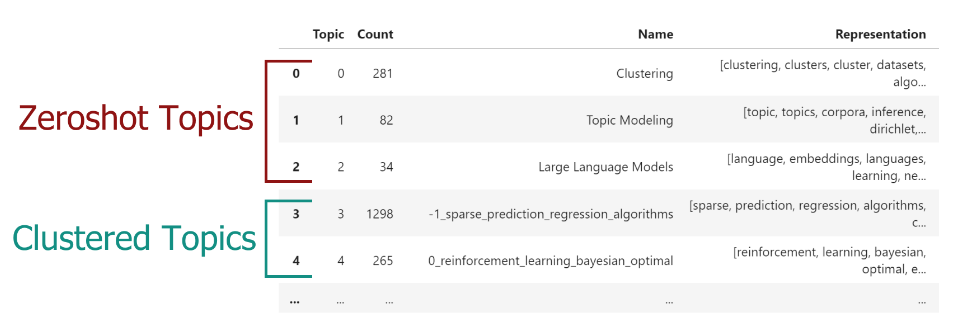

#**Topic Distributions**

In [ ]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups

docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))['data']
topic_model = BERTopic().fit(docs)

In [ ]:
topic_distr, _ = topic_model.approximate_distribution(docs)

In [ ]:
docs[1]

'My brother is in the market for a high-performance video card that supports\nVESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:\n\n  - Diamond Stealth Pro Local Bus\n\n  - Orchid Farenheit 1280\n\n  - ATI Graphics Ultra Pro\n\n  - Any other high-performance VLB card\n\n\nPlease post or email.  Thank you!\n\n  - Matt\n'

In [ ]:
topic_model.visualize_distribution(topic_distr[1])

In [ ]:
# Calculate the topic distributions on a token-level
topic_distr, topic_token_distr = topic_model.approximate_distribution(docs, calculate_tokens=True)

# Visualize the token-level distributions
df = topic_model.visualize_approximate_distribution(docs[1], topic_token_distr[1])
df

,My,brother,is,in,the,market,for,high,performance,video,card,that,supports,VESA,local,bus,with,2MB,RAM,Does,anyone,have,suggestions,ideas,on,Diamond,Stealth,Pro,Local,Bus,Orchid,Farenheit,1280,ATI,Graphics,Ultra,Pro,Any,other,high,performance,VLB,card,Please,post,or,email,Thank,you,Matt
4_you_your_post_jim,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.125,0.271,0.376,0.376,0.250,0.105,0.000,0.000
5_health_cancer_list_newsgroup,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.137,0.137,0.137,0.137,0.000,0.000,0.000
15_drive_drives_disk_controller,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.104,0.104,0.104,0.104,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
24_simms_simm_cache_meg,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.107,0.214,0.321,0.471,0.364,0.257,0.151,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
32_drivers_card_diamond_driver,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.196,0.414,0.629,0.828,0.632,0.515,0.415,0.215,0.215,0.114,0.000,0.000,0.000,0.000,0.000,0.202,0.455,0.706,0.955,0.864,0.611,0.360,0.111,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.163,0.344,0.543,0.779,0.616,0.435,0.236,0.000,0.000,0.000,0.000
39_space_launch_station_nasa,0.000,0.000,0.102,0.207,0.207,0.207,0.105,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
51_meg_drive_ram_sale,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.156,0.156,0.156,0.156,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
78_irq_port_com3_ports,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.112,0.112,0.112,0.112,0.000,0.000,0.000,0.000
79_motherboard_ram_mb_bios,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.120,0.253,0.387,0.496,0.477,0.485,0.506,0.397,0.444,0.414,0.373,0.555,0.407,0.297,0.183,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.108,0.108,0.108,0.108,0.000,0.000,0.000,0.000
80_board_connector_card_motherboard,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.125,0.125,0.125,0.125,0.000,0.000,0.000,0.000


#**Topics per Class**

In [ ]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))
docs = data["data"]
targets = data["target"]
target_names = data["target_names"]
classes = [data["target_names"][i] for i in data["target"]]

In [ ]:
topic_model = BERTopic(verbose=True)
topics, probs = topic_model.fit_transform(docs)

2024-10-15 16:14:58,894 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/589 [00:00<?, ?it/s]

2024-10-15 16:15:46,650 - BERTopic - Embedding - Completed ✓
2024-10-15 16:15:46,652 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-10-15 16:16:05,524 - BERTopic - Dimensionality - Completed ✓
2024-10-15 16:16:05,527 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-10-15 16:16:07,333 - BERTopic - Cluster - Completed ✓
2024-10-15 16:16:07,349 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-10-15 16:16:13,615 - BERTopic - Representation - Completed ✓


In [ ]:
topics_per_class = topic_model.topics_per_class(docs, classes=classes)

20it [00:07,  2.73it/s]


In [ ]:
topic_model.visualize_topics_per_class(topics_per_class, top_n_topics=10)

# **Seed Words**

In [ ]:
from umap import UMAP
from datasets import load_dataset
from bertopic import BERTopic
from bertopic.vectorizers import ClassTfidfTransformer

# Let's take a subset of ArXiv abstracts as the training data
dataset = load_dataset("CShorten/ML-ArXiv-Papers")["train"]
abstracts = dataset["abstract"][:5_000]

# For illustration purposes, we make sure the output is fixed when running this code multiple times
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)

# We can choose any number of seed words for which we want their representation
# to be strengthen. We increase the importance of these words as we want them to be more
# likely to end up in the topic representations.
ctfidf_model = ClassTfidfTransformer(
    seed_words=["agent", "robot", "behavior", "policies", "environment"],
    seed_multiplier=2
)

# We run the topic model with the seeded words
topic_model = BERTopic(
    umap_model=umap_model,
    min_topic_size=15,
    ctfidf_model=ctfidf_model,
).fit(abstracts)

README.md:   0%|          | 0.00/986 [00:00<?, ?B/s]

ML-Arxiv-Papers.csv:   0%|          | 0.00/147M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/117592 [00:00<?, ? examples/s]

In [ ]:
topic_model.get_topic(4)

[('regret', 0.03624471513059057),
 ('bandit', 0.03343767315561755),
 ('multiarmed', 0.0207974536723428),
 ('arms', 0.019783509098599775),
 ('reward', 0.018156340062123112),
 ('arm', 0.017353341034457046),
 ('the', 0.016251173617839905),
 ('problem', 0.01477213543307616),
 ('policies', 0.014626780604724608),
 ('bandits', 0.014269262466951317)]

# **Extra**

In [ ]:
model = BERTopic(language="english", top_n_words = 4, n_gram_range = (1,3), min_topic_size = 20, nr_topics = 8, low_memory=True, calculate_probabilities = False)
topics, probs = model.fit_transform(docs)

In [ ]:
model.get_topic_freq()
model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,6164,-1_the_to_of_and,"[the, to, of, and]",[I have come across what I consider to be an e...
1,0,4485,0_the_to_of_and,"[the, to, of, and]",[THE WHITE HOUSE\n\n Office...
2,1,3755,1_the_to_and_is,"[the, to, and, is]",[\n\nFrom: thomas@sunshine.Kodak.COM (Thomas K...
3,2,2877,2_the_of_to_and,"[the, of, to, and]","[Meta-exegesis: Conviction of Sin, part II\n\..."
4,3,914,3_the_to_and_of,"[the, to, and, of]",[\nWhile I don't read normally read this group...
5,4,365,4_the_of_to_and,"[the, of, to, and]",[------------- cut here -----------------\nlim...
6,5,227,5_the_to_it_and,"[the, to, it, and]","[[Newsgroups: m.h.a added, followups set to mo..."
7,6,59,6_the_fan_cpu_on,"[the, fan, cpu, on]","[N(P>Just got a 66MHz 486DX2 system, and am co..."
